In [211]:
import pandas as pd
from pandas.io.json import json_normalize
import numpy as np
import os,json
import csv
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.util import bigrams

In [181]:
from google.colab import files
uploaded = files.upload()

Saving ver1_scrapedweb-107.json to ver1_scrapedweb-107 (2).json
Saving ver1_scrapedweb-1023.json to ver1_scrapedweb-1023 (2).json
Saving ver1_scrapedweb-1024.json to ver1_scrapedweb-1024 (2).json
Saving ver1_scrapedweb-1025.json to ver1_scrapedweb-1025 (2).json
Saving ver1_scrapedweb-1026.json to ver1_scrapedweb-1026 (2).json
Saving ver1_scrapedweb-1027.json to ver1_scrapedweb-1027 (2).json
Saving ver1_scrapedweb-1030.json to ver1_scrapedweb-1030 (2).json
Saving ver1_scrapedweb-1031.json to ver1_scrapedweb-1031 (2).json
Saving ver1_scrapedweb-1032.json to ver1_scrapedweb-1032 (2).json
Saving ver1_scrapedweb-1033.json to ver1_scrapedweb-1033 (2).json
Saving ver1_scrapedweb-1034.json to ver1_scrapedweb-1034 (2).json
Saving ver1_scrapedweb-1035.json to ver1_scrapedweb-1035 (2).json
Saving ver1_scrapedweb-1036.json to ver1_scrapedweb-1036 (2).json
Saving ver1_scrapedweb-1037.json to ver1_scrapedweb-1037 (2).json
Saving ver1_scrapedweb-1063.json to ver1_scrapedweb-1063 (2).json
Saving ver1_

In [212]:
json_list = ["ver1_scrapedweb-107.json","ver1_scrapedweb-1023.json","ver1_scrapedweb-1024.json","ver1_scrapedweb-1025.json","ver1_scrapedweb-1026.json","ver1_scrapedweb-1027.json","ver1_scrapedweb-1030.json","ver1_scrapedweb-1031.json","ver1_scrapedweb-1032.json","ver1_scrapedweb-1033.json","ver1_scrapedweb-1034.json","ver1_scrapedweb-1035.json","ver1_scrapedweb-1036.json","ver1_scrapedweb-1037.json","ver1_scrapedweb-1063.json","ver1_scrapedweb-1065.json","ver1_scrapedweb-1068.json","ver1_scrapedweb-1070.json"]

data_list=[]
for i in json_list:
  data_list.append(uploaded[i].decode("utf-8"))
data_list

['{"text": ["Easy Halloween Painting | Adorable Witch Sisters In The Woods | #Lovefallart #Painting | The Art Sherpa", "canvas painting for beginners videos", " ", " ", " BEGINNER HOW TO PAINT art lesson \\" Adorable Witch Sisters in the woods \\" with a black cat in acrylic art tutorial. Create this easy HALLOWEEN PAINTING in acrylic from this fun and easy art lesson . Full painting : ", "http://bit.ly/1RxdK2F", " traceable ", "http://bit.ly/22sgTCT", " The Creative Art Collaborations Presents Love a love of autumn and fall video art festival. Just use the hashtag to get your ticket for a sea of amazing creativity. Tons of artists have created art and craft videos for your fall viewing enjoyment ", "#lovefallart", " ", "#painting", " ", "#creativeartscollaboration", " Great for a private at HOME PAINTING PARTY with friends and family. This fully guided step by step ACRYLIC PAINTING LESSON will have you hanging your own art on your wall in just a few hours. This is a lot of fun and all

In [213]:
df = pd.DataFrame(zip(data_list, data_list),
               columns =['Raw_Text', 'Processed_Text'])
df.head(18)

,Raw_Text,Processed_Text
0,"{""text"": [""Easy Halloween Painting | Adorable ...","{""text"": [""Easy Halloween Painting | Adorable ..."
1,"{""text"": [""Unedited Photos That Show Just How ...","{""text"": [""Unedited Photos That Show Just How ..."
2,"{""text"": [""Watch | ABC6"", ""Watch ABC6 online"",...","{""text"": [""Watch | ABC6"", ""Watch ABC6 online"",..."
3,"{""text"": [""Art | Thiel College"", ""Thiel Colleg...","{""text"": [""Art | Thiel College"", ""Thiel Colleg..."
4,"{""text"": ["" Watch Shrek Forever After (2010) -...","{""text"": ["" Watch Shrek Forever After (2010) -..."
5,"{""text"": [""Manual de can\u00e7\u00f5es de 28 A...","{""text"": [""Manual de can\u00e7\u00f5es de 28 A..."
6,"{""text"": [""FORCE OF FEELING Chapter 1 - Manhua...","{""text"": [""FORCE OF FEELING Chapter 1 - Manhua..."
7,"{""text"": [""\r\n\tIdhi Nadhi Movie Pooja Ceremo...","{""text"": [""\r\n\tIdhi Nadhi Movie Pooja Ceremo..."
8,"{""text"": [""DOWNLOAD DeJ Loaf - Tap In (feat. 4...","{""text"": [""DOWNLOAD DeJ Loaf - Tap In (feat. 4..."
9,"{""text"": [""Friday Funday | Visit Sarasota"", ""I...","{""text"": [""Friday Funday | Visit Sarasota"", ""I..."


# **NLP**

**Data Cleansing**

In [214]:
for i in range(10):
  df['Processed_Text'].values[i] = re.sub(r'^https?:\/\/.*[\r\n]*', '', df['Processed_Text'].values[i], flags=re.MULTILINE)
  df['Processed_Text'].values[i] = re.sub(r"\W", " ", df['Processed_Text'].values[i])
  df['Processed_Text'].values[i] = re.sub(r" n ", " ", df['Processed_Text'].values[i])
  df['Processed_Text'].values[i] = re.sub(r" r ", " ", df['Processed_Text'].values[i])
  df['Processed_Text'].values[i] = " ".join(df['Processed_Text'].values[i].split())
  df['Processed_Text'].values[i] = df['Processed_Text'].values[i].split(' ', 1)[1]
  for j in range(5):
    df['Processed_Text'].values[j] = re.sub(r" t ", " ", df['Processed_Text'].values[j])
  df=df.replace('\*','',regex=True)
df["Processed_Text"][0]

'Easy Halloween Painting Adorable Witch Sisters In The Woods Lovefallart Painting The Art Sherpa canvas painting for beginners videos BEGINNER HOW TO PAINT art lesson Adorable Witch Sisters in the woods with a black cat in acrylic art tutorial Create this easy HALLOWEEN PAINTING in acrylic from this fun and easy art lesson Full painting http bit ly 1RxdK2F traceable http bit ly 22sgTCT The Creative Art Collaborations Presents Love a love of autumn and fall video art festival Just use the hashtag to get your ticket for a sea of amazing creativity Tons of artists have created art and craft videos for your fall viewing enjoyment lovefallart painting creativeartscollaboration Great for a private at HOME PAINTING PARTY with friends and family This fully guided step by step ACRYLIC PAINTING LESSON will have you hanging your own art on your wall in just a few hours This is a lot of fun and all you have to do is just believe you have art in your heart Love halloween Love Witches 100 FREE all t

In [215]:
for m in range(18):
  print(df['Processed_Text'].values[m])
  print()

Easy Halloween Painting Adorable Witch Sisters In The Woods Lovefallart Painting The Art Sherpa canvas painting for beginners videos BEGINNER HOW TO PAINT art lesson Adorable Witch Sisters in the woods with a black cat in acrylic art tutorial Create this easy HALLOWEEN PAINTING in acrylic from this fun and easy art lesson Full painting http bit ly 1RxdK2F traceable http bit ly 22sgTCT The Creative Art Collaborations Presents Love a love of autumn and fall video art festival Just use the hashtag to get your ticket for a sea of amazing creativity Tons of artists have created art and craft videos for your fall viewing enjoyment lovefallart painting creativeartscollaboration Great for a private at HOME PAINTING PARTY with friends and family This fully guided step by step ACRYLIC PAINTING LESSON will have you hanging your own art on your wall in just a few hours This is a lot of fun and all you have to do is just believe you have art in your heart Love halloween Love Witches 100 FREE all th

**Stop Words Removal**

In [216]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
stop = stopwords.words('english')
stop.append('n')
stop.append('r')
lem = WordNetLemmatizer()
stem = PorterStemmer()
for i in range(10):
   x = df['Processed_Text'].values[i]
   token = nltk.word_tokenize(x)
   df['Processed_Text'].values[i] = token
   c = [t for t in token if not t in stop]
   df['Processed_Text'].values[i] = c
df.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Raw_Text,Processed_Text
0,"{""text"": [""Easy Halloween Painting | Adorable ...","[Easy, Halloween, Painting, Adorable, Witch, S..."
1,"{""text"": [""Unedited Photos That Show Just How ...","[Unedited, Photos, That, Show, Just, How, Craz..."
2,"{""text"": [""Watch | ABC6"", ""Watch ABC6 online"",...","[Watch, ABC6, Watch, ABC6, online, Main, Navig..."
3,"{""text"": [""Art | Thiel College"", ""Thiel Colleg...","[Art, Thiel, College, Thiel, College, fine, ar..."
4,"{""text"": ["" Watch Shrek Forever After (2010) -...","[Watch, Shrek, Forever, After, 2010, Streaming..."


**Tokenization**

In [217]:
def tokenizing(Processed_Text):
  split = re.split('\W+', Processed_Text)
  return split

In [218]:
df['Processed_Text'][0]

['Easy',
 'Halloween',
 'Painting',
 'Adorable',
 'Witch',
 'Sisters',
 'In',
 'The',
 'Woods',
 'Lovefallart',
 'Painting',
 'The',
 'Art',
 'Sherpa',
 'canvas',
 'painting',
 'beginners',
 'videos',
 'BEGINNER',
 'HOW',
 'TO',
 'PAINT',
 'art',
 'lesson',
 'Adorable',
 'Witch',
 'Sisters',
 'woods',
 'black',
 'cat',
 'acrylic',
 'art',
 'tutorial',
 'Create',
 'easy',
 'HALLOWEEN',
 'PAINTING',
 'acrylic',
 'fun',
 'easy',
 'art',
 'lesson',
 'Full',
 'painting',
 'http',
 'bit',
 'ly',
 '1RxdK2F',
 'traceable',
 'http',
 'bit',
 'ly',
 '22sgTCT',
 'The',
 'Creative',
 'Art',
 'Collaborations',
 'Presents',
 'Love',
 'love',
 'autumn',
 'fall',
 'video',
 'art',
 'festival',
 'Just',
 'use',
 'hashtag',
 'get',
 'ticket',
 'sea',
 'amazing',
 'creativity',
 'Tons',
 'artists',
 'created',
 'art',
 'craft',
 'videos',
 'fall',
 'viewing',
 'enjoyment',
 'lovefallart',
 'painting',
 'creativeartscollaboration',
 'Great',
 'private',
 'HOME',
 'PAINTING',
 'PARTY',
 'friends',
 'family

**Stemming**

In [219]:
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer

for x in range(10):
  z = []
  y = df['Processed_Text'].values[x]
  for j in y:
    z.append(stem.stem(j))
  df['Processed_Text'].values[x] = z
df.head()

,Raw_Text,Processed_Text
0,"{""text"": [""Easy Halloween Painting | Adorable ...","[easi, halloween, paint, ador, witch, sister, ..."
1,"{""text"": [""Unedited Photos That Show Just How ...","[unedit, photo, that, show, just, how, crazi, ..."
2,"{""text"": [""Watch | ABC6"", ""Watch ABC6 online"",...","[watch, abc6, watch, abc6, onlin, main, navig,..."
3,"{""text"": [""Art | Thiel College"", ""Thiel Colleg...","[art, thiel, colleg, thiel, colleg, fine, art,..."
4,"{""text"": ["" Watch Shrek Forever After (2010) -...","[watch, shrek, forev, after, 2010, stream, t6,..."


**Lemmatization**

In [220]:
nltk.download('wordnet')
for x in range(10):
  z = []
  y = df['Processed_Text'].values[x]
  for j in y:
    z.append(lem.lemmatize(j))
  df['Processed_Text'].values[x] = z
df.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Raw_Text,Processed_Text
0,"{""text"": [""Easy Halloween Painting | Adorable ...","[easi, halloween, paint, ador, witch, sister, ..."
1,"{""text"": [""Unedited Photos That Show Just How ...","[unedit, photo, that, show, just, how, crazi, ..."
2,"{""text"": [""Watch | ABC6"", ""Watch ABC6 online"",...","[watch, abc6, watch, abc6, onlin, main, navig,..."
3,"{""text"": [""Art | Thiel College"", ""Thiel Colleg...","[art, thiel, colleg, thiel, colleg, fine, art,..."
4,"{""text"": ["" Watch Shrek Forever After (2010) -...","[watch, shrek, forev, after, 2010, stream, t6,..."


**Bigram Formation**

In [221]:
for m in range(17):
  tex = df['Processed_Text'].values[m]
  bigram = gensim.models.Phrases(tex, min_count=5, threshold=100) 
  bigram_mod = gensim.models.phrases.Phraser(bigram)

  df['Processed_Text'].values[m] = bigram_mod[tex]

# **LDA Model**

In [222]:
import re
import numpy as np
import pandas as pd
from pprint import pprint
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import spacy
!pip install pyLDAvis
import pyLDAvis
import pyLDAvis.gensim_models

import matplotlib.pyplot as plt
%matplotlib inline

import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

**Bag of Words**

In [234]:
dictionary = corpora.Dictionary(data)
corp = data
corpus = [dictionary.doc2bow(text) for text in corp]
print(corpus)

[[(0, 1), (1, 2), (2, 1), (3, 1), (4, 1), (5, 1), (6, 3), (7, 1), (8, 1), (9, 1), (10, 4), (11, 2), (12, 1), (13, 2), (14, 2), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 2), (21, 1), (22, 17), (23, 1), (24, 2), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 30), (32, 3), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 8), (41, 1), (42, 2), (43, 1), (44, 2), (45, 2), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 2), (53, 1), (54, 1), (55, 3), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 3), (65, 6), (66, 1), (67, 1), (68, 1), (69, 2), (70, 1), (71, 1), (72, 1), (73, 1), (74, 3), (75, 4), (76, 1), (77, 1), (78, 1), (79, 2), (80, 1), (81, 1), (82, 1), (83, 1), (84, 1), (85, 4), (86, 1), (87, 1), (88, 4), (89, 1), (90, 2), (91, 2), (92, 1), (93, 1), (94, 1), (95, 3), (96, 1), (97, 2), (98, 2), (99, 1), (100, 1), (101, 1), (102, 1), (103, 1), (104, 1), (105, 2), (106, 1), (107, 2), (108, 1), (109, 1), (110, 

**TF-IDF**

In [235]:
from gensim import corpora, models
tfidf = models.TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]
from pprint import pprint
for doc in corpus_tfidf:
    pprint(doc)
    break

[(0, 0.020230403380445176),
 (1, 0.04046080676089035),
 (2, 0.020230403380445176),
 (3, 0.020230403380445176),
 (4, 0.020230403380445176),
 (5, 0.020230403380445176),
 (6, 0.06069121014133553),
 (7, 0.020230403380445176),
 (8, 0.020230403380445176),
 (9, 0.020230403380445176),
 (10, 0.0809216135217807),
 (11, 0.04046080676089035),
 (12, 0.020230403380445176),
 (13, 0.04046080676089035),
 (14, 0.04046080676089035),
 (15, 0.020230403380445176),
 (16, 0.020230403380445176),
 (17, 0.020230403380445176),
 (18, 0.020230403380445176),
 (19, 0.020230403380445176),
 (20, 0.04046080676089035),
 (21, 0.015378900446112356),
 (22, 0.343916857467568),
 (23, 0.020230403380445176),
 (24, 0.04046080676089035),
 (25, 0.015378900446112356),
 (26, 0.020230403380445176),
 (27, 0.020230403380445176),
 (28, 0.015378900446112356),
 (29, 0.020230403380445176),
 (30, 0.020230403380445176),
 (31, 0.315821925353386),
 (32, 0.037622859472167),
 (33, 0.020230403380445176),
 (34, 0.020230403380445176),
 (35, 0.02023

**Building of Topic Model**

In [236]:
lda_model = gensim.models.LdaMulticore(corpus, num_topics=20, id2word=dictionary, passes=10, workers=2, random_state=10)

In [237]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.114*"u2013" + 0.031*"album" + 0.026*"yanni" + 0.024*"feat" + 0.018*"mix" + 0.016*"download" + 0.014*"video" + 0.012*"the" + 0.012*"u201d" + 0.010*"babi"
Topic: 1 
Words: 0.021*"art" + 0.021*"identidad" + 0.021*"baterista" + 0.021*"u00e9" + 0.021*"morai" + 0.021*"u00e1lbum" + 0.021*"martini" + 0.021*"murai" + 0.021*"pau" + 0.021*"nova"
Topic: 2 
Words: 0.001*"art" + 0.001*"u2013" + 0.001*"thiel" + 0.001*"paint" + 0.001*"friday" + 0.001*"the" + 0.001*"student" + 0.001*"u2019" + 0.001*"acryl" + 0.001*"work"
Topic: 3 
Words: 0.001*"u2013" + 0.001*"album" + 0.001*"the" + 0.001*"feat" + 0.001*"friday" + 0.001*"yanni" + 0.001*"u2019" + 0.001*"mix" + 0.001*"video" + 0.001*"night"
Topic: 4 
Words: 0.001*"u2013" + 0.001*"friday" + 0.001*"the" + 0.001*"u2019" + 0.001*"album" + 0.001*"night" + 0.001*"music" + 0.001*"yanni" + 0.001*"sarasota" + 0.001*"chapter"
Topic: 5 
Words: 0.056*"art" + 0.043*"paint" + 0.020*"acryl" + 0.016*"lesson" + 0.014*"thiel" + 0.012*"student" + 0.009*"

**Perplexity and Coherence**

In [238]:
print("With Bag Of Words:\n")
print('\nPerplexity with BoW: ', lda_model.log_perplexity(corpus), )  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

With Bag Of Words:


Perplexity with BoW:  -6.746366396101008

Coherence Score:  0.5210120712448123


**Hyperparameters**

In [239]:
def compute_coherence_values(corpus, dictionary, k, a, b):
    
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=k, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha=a,
                                           eta=b)
    
    coherence_model_lda = CoherenceModel(model=lda_model, texts=data, dictionary=dictionary, coherence='c_v')
    
    return coherence_model_lda.get_coherence()

In [260]:
import numpy as np
import tqdm
grid = {}
grid['Validation_Set'] = {}
min_topics = 2
max_topics = 11
step_size = 1
topics_range = range(min_topics, max_topics, step_size)
alpha = list(np.arange(0.01, 1, 0.3))
alpha.append('symmetric')
alpha.append('asymmetric')
beta = list(np.arange(0.01, 1, 0.3))
beta.append('symmetric')
num_of_docs = len(corpus)
corpus_sets = [# gensim.utils.ClippedCorpus(corpus, num_of_docs*0.25), 
               # gensim.utils.ClippedCorpus(corpus, num_of_docs*0.5), 
               gensim.utils.ClippedCorpus(corpus, int(num_of_docs*0.75)), 
               corpus]
corpus_title = ['75% Corpus', '100% Corpus']
model_results = {'Validation_Set': [],
                 'Topics': [],
                 'Alpha': [],
                 'Beta': [],
                 'Coherence': []
                }
if 1 == 1:
    pbar = tqdm.tqdm(total=540)
    for i in range(len(corpus_sets)):
        for k in topics_range:
            for a in alpha:
                for b in beta:
                    cv = compute_coherence_values(corpus=corpus_sets[i], dictionary=dictionary, k=k, a=a, b=b)
                    model_results['Validation_Set'].append(corpus_title[i])
                    model_results['Topics'].append(k)
                    model_results['Alpha'].append(a)
                    model_results['Beta'].append(b)
                    model_results['Coherence'].append(cv)
                    
                    pbar.update(1)
    
    pbar.close()

  0%|          | 0/540 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1023: RuntimeWarning: divide by zero encountered in log
  diff = np.log(self.expElogbeta)
100%|██████████| 540/540 [06:39<00:00,  1.35it/s]


In [261]:
evaluation_df = pd.DataFrame.from_dict(model_results)
print(evaluation_df)

    Validation_Set  Topics       Alpha       Beta  Coherence
0       75% Corpus       2        0.01       0.01   0.372142
1       75% Corpus       2        0.01       0.31   0.377143
2       75% Corpus       2        0.01       0.61   0.368177
3       75% Corpus       2        0.01       0.91   0.366055
4       75% Corpus       2        0.01  symmetric   0.368177
..             ...     ...         ...        ...        ...
535    100% Corpus      10  asymmetric       0.01   0.482629
536    100% Corpus      10  asymmetric       0.31   0.483389
537    100% Corpus      10  asymmetric       0.61   0.485251
538    100% Corpus      10  asymmetric       0.91   0.488493
539    100% Corpus      10  asymmetric  symmetric   0.479717

[540 rows x 5 columns]


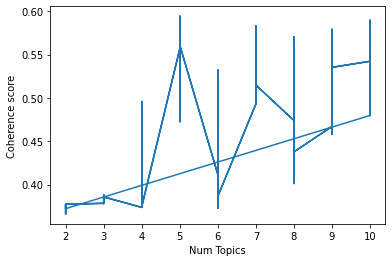

In [268]:
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(evaluation_df["Topics"], evaluation_df["Coherence"])
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.show()

In [269]:
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

In [248]:
lda_model = gensim.models.LdaMulticore(corpus, num_topics=9, id2word=dictionary, alpha = 0.05, eta = 0.61, passes=20, workers=2, random_state=10)

In [249]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.054*"u2013" + 0.015*"album" + 0.013*"yanni" + 0.012*"feat" + 0.009*"mix" + 0.008*"download" + 0.007*"video" + 0.006*"the" + 0.006*"u201d" + 0.005*"babi"
Topic: 1 
Words: 0.005*"art" + 0.005*"u00e9" + 0.005*"baterista" + 0.005*"identidad" + 0.005*"u00e1lbum" + 0.005*"morai" + 0.005*"martini" + 0.005*"mostra" + 0.005*"murai" + 0.005*"pau"
Topic: 2 
Words: 0.001*"art" + 0.001*"thiel" + 0.001*"student" + 0.001*"friday" + 0.001*"u2013" + 0.001*"the" + 0.001*"minor" + 0.001*"studio" + 0.001*"major" + 0.001*"work"
Topic: 3 
Words: 0.004*"shrek" + 0.002*"stream" + 0.002*"life" + 0.002*"jon" + 0.002*"craig" + 0.002*"burden" + 0.002*"place" + 0.002*"after" + 0.002*"juli" + 0.002*"kay"
Topic: 4 
Words: 0.021*"friday" + 0.012*"the" + 0.012*"u2019" + 0.011*"night" + 0.010*"sarasota" + 0.008*"music" + 0.006*"art" + 0.006*"even" + 0.005*"work" + 0.005*"event"
Topic: 5 
Words: 0.034*"art" + 0.026*"paint" + 0.012*"acryl" + 0.010*"lesson" + 0.009*"thiel" + 0.007*"student" + 0.006*"the

**Topic Distribution**

In [282]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
topic_distribution= []
for i in range(18):
  tokens = [stemmer.stem(token) for token in nltk.word_tokenize(data_list[i].lower()) if token not in stop_words]
  print(lda_model[dictionary.doc2bow(tokens)][0])
  topic_distribution.append(lda_model[dictionary.doc2bow(tokens)][0])

(5, 0.99916226)
(6, 0.9956733)
(6, 0.9756839)
(5, 0.9981083)
(3, 0.99174404)
(1, 0.99388844)
(5, 0.97026026)
(7, 0.9821826)
(0, 0.99885535)
(4, 0.99899614)
(0, 0.11111111)
(5, 0.94630873)
(4, 0.41464168)
(7, 0.95266277)
(4, 0.6491256)
(0, 0.014492754)
(5, 0.94630873)
(0, 0.11111111)


# **Visualizations**

**Word Cloud**

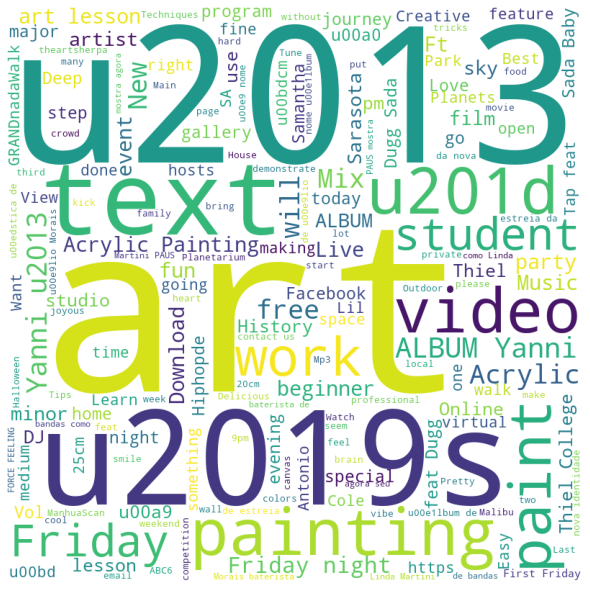

In [277]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
comment_words = ''
comment_words += " ".join(data_list)+" "
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

**Assign the topic distribution to each Document**

In [264]:
topic_dist = []
for i in range(17):
  text = data[i]
  print("The topic  in the document number {}: ".format(i+1),lda_model[dictionary.doc2bow(text)])
  topic_dist.append(lda_model[dictionary.doc2bow(text)])

The topic  in the document number 1:  [(5, 0.9993012)]
The topic  in the document number 2:  [(6, 0.99601793)]
The topic  in the document number 3:  [(6, 0.97707736)]
The topic  in the document number 4:  [(5, 0.9983295)]
The topic  in the document number 5:  [(3, 0.9926538)]
The topic  in the document number 6:  [(1, 0.9957649)]
The topic  in the document number 7:  [(5, 0.9756839)]
The topic  in the document number 8:  [(7, 0.98487717)]
The topic  in the document number 9:  [(0, 0.9991294)]
The topic  in the document number 10:  [(4, 0.9991388)]
The topic  in the document number 11:  [(0, 0.11111111), (1, 0.11111111), (2, 0.11111111), (3, 0.11111111), (4, 0.11111111), (5, 0.11111111), (6, 0.11111111), (7, 0.11111111), (8, 0.11111111)]
The topic  in the document number 12:  [(0, 0.11111111), (1, 0.11111111), (2, 0.11111111), (3, 0.11111111), (4, 0.11111111), (5, 0.11111111), (6, 0.11111111), (7, 0.11111111), (8, 0.11111111)]
The topic  in the document number 13:  [(0, 0.11111111), (1,

**Final Dataframe**

In [256]:
df_final = pd.DataFrame(list(zip(json_list,data_list, topic_dist) ), columns=['Web page file', 'Tokenized Text','Topics Distribution'])

In [257]:
print(df_final)

                Web page file  ...                                Topics Distribution
0    ver1_scrapedweb-107.json  ...                                   [(5, 0.9993012)]
1   ver1_scrapedweb-1023.json  ...                                  [(6, 0.99601793)]
2   ver1_scrapedweb-1024.json  ...                                  [(6, 0.97707736)]
3   ver1_scrapedweb-1025.json  ...                                   [(5, 0.9983295)]
4   ver1_scrapedweb-1026.json  ...                                   [(3, 0.9926538)]
5   ver1_scrapedweb-1027.json  ...                                   [(1, 0.9957649)]
6   ver1_scrapedweb-1030.json  ...                                   [(5, 0.9756839)]
7   ver1_scrapedweb-1031.json  ...                                  [(7, 0.98487717)]
8   ver1_scrapedweb-1032.json  ...                                   [(0, 0.9991294)]
9   ver1_scrapedweb-1033.json  ...                                   [(4, 0.9991388)]
10  ver1_scrapedweb-1034.json  ...  [(0, 0.11111111), 